In [71]:
from typing import List, Dict, Any
import json
def load_performance_results(file_path: str) -> List[Dict[str, Any]]:
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            results = json.load(f)
        
        # 验证读取结果是否为字典列表
        if not isinstance(results, list) or not all(isinstance(item, dict) for item in results):
            raise ValueError("文件内容格式错误，应为字典组成的列表")
        
        return results
    except FileNotFoundError:
        raise FileNotFoundError(f"文件不存在: {file_path}")
    except json.JSONDecodeError as e:
        raise json.JSONDecodeError(f"文件格式错误，不是有效的JSON: {str(e)}", e.doc, e.pos) from e
    except IOError as e:
        raise IOError(f"读取文件失败: {str(e)}") from e

In [72]:
ans = load_performance_results('output.json')
print(ans)

[{'program_name': './run_int8.out', 'run_args': './modelq_110M.bin', 'run_count': 10, 'tok_per_s_avg': 117.5354902, 'ftl_per_ms_avg': 13.8, 'memory_usage_avg': 208.4921874, 'power_consumption_avg': 0.1063634}, {'program_name': './run_int16.out', 'run_args': './modelq16_110M.bin', 'run_count': 10, 'tok_per_s_avg': 129.5875964, 'ftl_per_ms_avg': 14.3, 'memory_usage_avg': 312.93632820000005, 'power_consumption_avg': 0.0964672}, {'program_name': './run_fp32.out', 'run_args': './model_110M.bin', 'run_count': 10, 'tok_per_s_avg': 108.96948, 'ftl_per_ms_avg': 12.8, 'memory_usage_avg': 422.26445279999996, 'power_consumption_avg': 0.11471469999999999}, {'program_name': './run_no_paral.out', 'run_args': './modelq_110M.bin', 'run_count': 10, 'tok_per_s_avg': 22.5288546, 'ftl_per_ms_avg': 47.4, 'memory_usage_avg': 208.82890609999998, 'power_consumption_avg': 0.5548545}, {'program_name': './run_paral.out', 'run_args': './modelq_110M.bin', 'run_count': 10, 'tok_per_s_avg': 133.5895544, 'ftl_per_ms_a

In [73]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Noto Sans CJK JP'

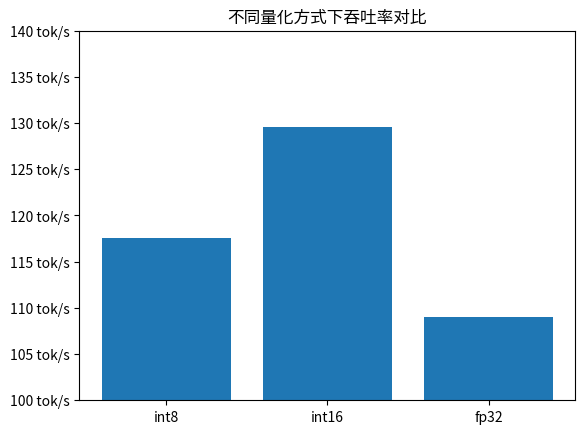

In [74]:
x=np.arange(3)
y=[]
for i in range(3):
    y.append(ans[i]['tok_per_s_avg'])
y=np.array(y)
fig, ax=plt.subplots()
ax.bar(x,y)
ax.yaxis.set_major_formatter(lambda x,p: f'{x:,.0f} tok/s')
ax.set_xticks(x)
ax.set_xticklabels(['int8','int16','fp32'])
plt.ylim(100, 140)
plt.title("不同量化方式下吞吐率对比")
plt.show()

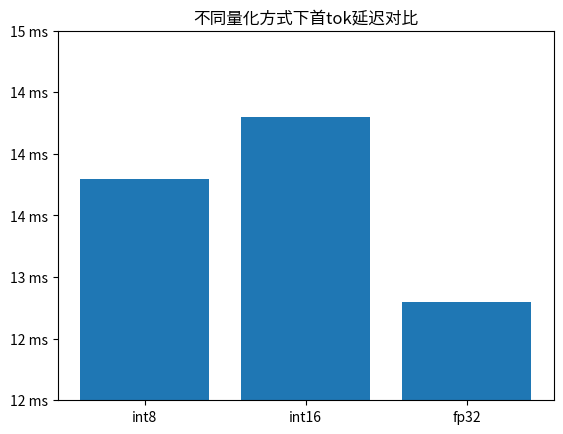

In [75]:
x=np.arange(3)
y=[]
for i in range(3):
    y.append(ans[i]['ftl_per_ms_avg'])
y=np.array(y)
fig, ax=plt.subplots()
ax.bar(x,y)
ax.yaxis.set_major_formatter(lambda x,p: f'{x:,.0f} ms')
ax.set_xticks(x)
ax.set_xticklabels(['int8','int16','fp32'])
plt.ylim(12, 15)
plt.title("不同量化方式下首tok延迟对比")
plt.show()

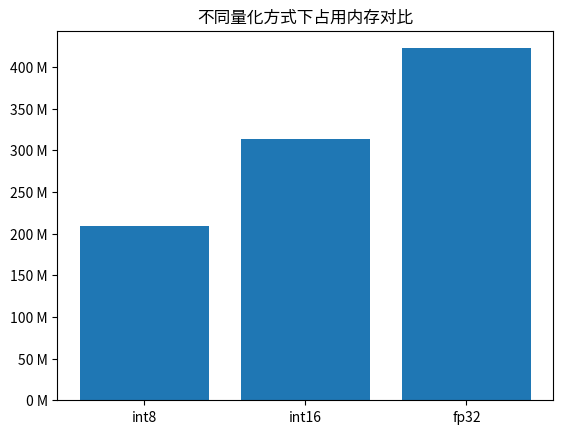

In [76]:
x=np.arange(3)
y=[]
for i in range(3):
    y.append(ans[i]['memory_usage_avg'])
y=np.array(y)
fig, ax=plt.subplots()
ax.bar(x,y)
ax.yaxis.set_major_formatter(lambda x,p: f'{x:,.0f} M')
ax.set_xticks(x)
ax.set_xticklabels(['int8','int16','fp32'])
plt.title("不同量化方式下占用内存对比")
plt.show()

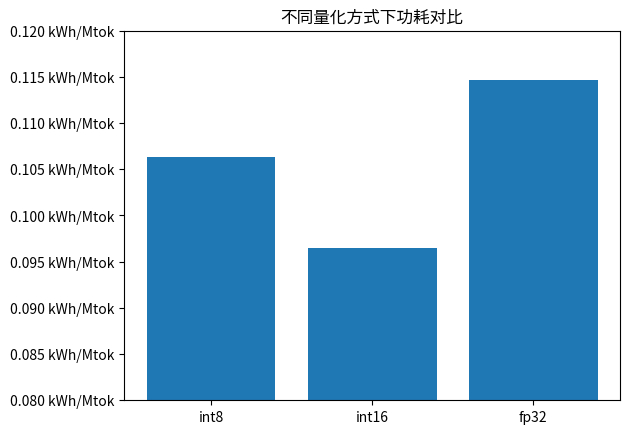

In [77]:
x=np.arange(3)
y=[]
for i in range(3):
    y.append(ans[i]['power_consumption_avg'])
y=np.array(y)
fig, ax=plt.subplots()
ax.bar(x,y)
ax.yaxis.set_major_formatter(lambda x,p: f'{x:.3f} kWh/Mtok')
plt.ylim(0.08, 0.12)
ax.set_xticks(x)
ax.set_xticklabels(['int8','int16','fp32'])
plt.title("不同量化方式下功耗对比")
plt.show()

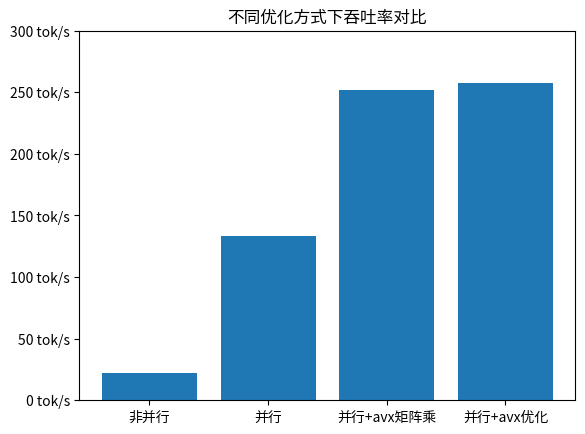

In [78]:
x=np.arange(4)
y=[]
for i in [3,4,5,6]:
    y.append(ans[i]['tok_per_s_avg'])
y=np.array(y)
fig, ax=plt.subplots()
ax.bar(x,y)
ax.yaxis.set_major_formatter(lambda x,p: f'{x:,.0f} tok/s')
ax.set_xticks(x)
ax.set_xticklabels(['非并行','并行','并行+avx矩阵乘','并行+avx优化'])
plt.ylim(0, 300)
plt.title("不同优化方式下吞吐率对比")
plt.show()

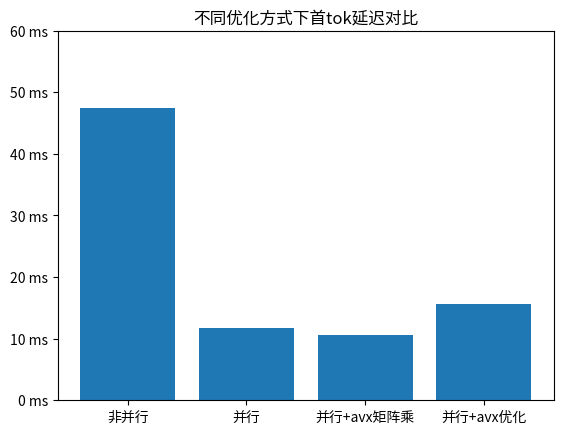

In [79]:
x=np.arange(4)
y=[]
for i in [3,4,5,6]:
    y.append(ans[i]['ftl_per_ms_avg'])
y=np.array(y)
fig, ax=plt.subplots()
ax.bar(x,y)
ax.yaxis.set_major_formatter(lambda x,p: f'{x:,.0f} ms')
ax.set_xticks(x)
ax.set_xticklabels(['非并行','并行','并行+avx矩阵乘','并行+avx优化'])
plt.ylim(0, 60)
plt.title("不同优化方式下首tok延迟对比")
plt.show()

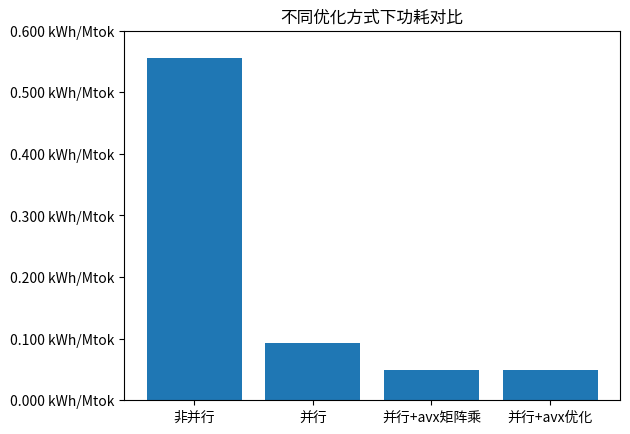

In [80]:
x=np.arange(4)
y=[]
for i in [3,4,5,6]:
    y.append(ans[i]['power_consumption_avg'])
y=np.array(y)
fig, ax=plt.subplots()
ax.bar(x,y)
ax.yaxis.set_major_formatter(lambda x,p: f'{x:.3f} kWh/Mtok')
ax.set_xticks(x)
ax.set_xticklabels(['非并行','并行','并行+avx矩阵乘','并行+avx优化'])
plt.ylim(0, 0.6)
plt.title("不同优化方式下功耗对比")
plt.show()

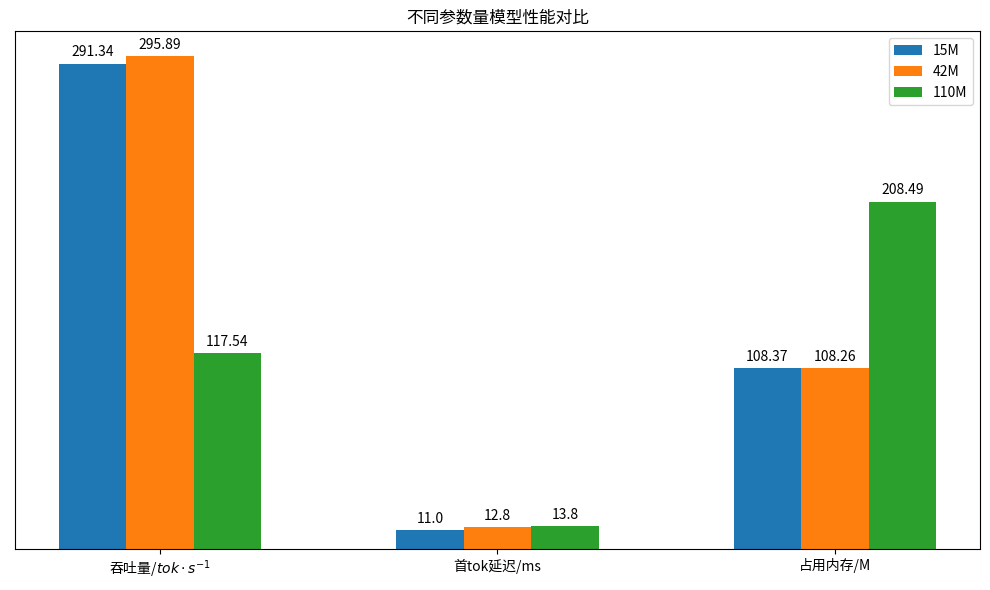

In [81]:
categories = [r'吞吐量/$tok \cdot s^{-1}$', '首tok延迟/ms', '占用内存/M']
values1 = [291.34, 11.0, 108.37]
values2 = [295.89, 12.8, 108.26]
values3 = [117.54, 13.8, 208.49]

x = np.arange(len(categories))  # 标签位置
width = 0.2  # 柱状图的宽度

fig, ax = plt.subplots(figsize=(10, 6))

# 为每个类别设置单独的y轴范围
y_limits = [(100, 300), (10, 15), (100, 250)]  # 分别为三个类别设置y轴范围

# 绘制柱状图
bars1 = ax.bar(x - width, values1, width, label='15M', )
bars2 = ax.bar(x, values2, width, label='42M')
bars3 = ax.bar(x + width, values3, width, label='110M')

# 为每个柱子添加数据标签
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 垂直偏移
                    textcoords="offset points",
                    ha='center', va='bottom')

# 设置x轴
ax.set_xticks(x)
ax.set_xticklabels(categories)

# 去掉y轴刻度
ax.set_yticks([])

    # 在底部添加类别名称
    # ax.text(i, -5, category, ha='center', va='top', fontsize=12)

# 设置整体y轴范围以适应所有数据
# ax.set_ylim(0, 65)

plt.title('不同参数量模型性能对比')
plt.legend()
plt.tight_layout()
plt.show()
